In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e7/sample_submission.csv")

In [4]:
train.columns = train.columns.str.replace(' ', '_').str.lower()
test.columns = test.columns.str.replace(' ', '_').str.lower()

# Data Expolaration


In [5]:
train.head(5)

,id,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
print(f"Dataset Shape: {train.shape}")

print("\nData Info:")
train.info()

print("\nNumerical Features Summary:")
display(train.describe())

Dataset Shape: (18524, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   time_spent_alone           17334 non-null  float64
 2   stage_fear                 16631 non-null  object 
 3   social_event_attendance    17344 non-null  float64
 4   going_outside              17058 non-null  float64
 5   drained_after_socializing  17375 non-null  object 
 6   friends_circle_size        17470 non-null  float64
 7   post_frequency             17260 non-null  float64
 8   personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB

Numerical Features Summary:


,id,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
train.isnull().sum()

id                              0
time_spent_alone             1190
stage_fear                   1893
social_event_attendance      1180
going_outside                1466
drained_after_socializing    1149
friends_circle_size          1054
post_frequency               1264
personality                     0
dtype: int64

In [8]:
test.isnull().sum()

id                             0
time_spent_alone             425
stage_fear                   598
social_event_attendance      397
going_outside                466
drained_after_socializing    432
friends_circle_size          350
post_frequency               408
dtype: int64

In [9]:
train['personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

# Data Cleaning


In [10]:
for col in ['stage_fear', 'drained_after_socializing']:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
    test[col] = test[col].fillna(mode_val)

In [11]:
num_cols = ['time_spent_alone', 'social_event_attendance', 'going_outside', 
            'friends_circle_size', 'post_frequency']

for col in num_cols:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)
    test[col] = test[col].fillna(median_val)

In [12]:
binary_map = {'Yes': 1, 'No': 0}
for col in ['stage_fear', 'drained_after_socializing']:
    train[col] = train[col].map(binary_map)
    test[col] = test[col].map(binary_map)

In [13]:
print(train['personality'].value_counts())

personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


# Univariate Analysis


In [14]:
sns.set(style="whitegrid")

In [15]:
numerical_features = ['time_spent_alone', 'social_event_attendance', 
                      'going_outside', 'friends_circle_size', 'post_frequency']

categorical_features = ['stage_fear', 'drained_after_socializing', 'personality']


**Univariate Plots for Numerical Features**

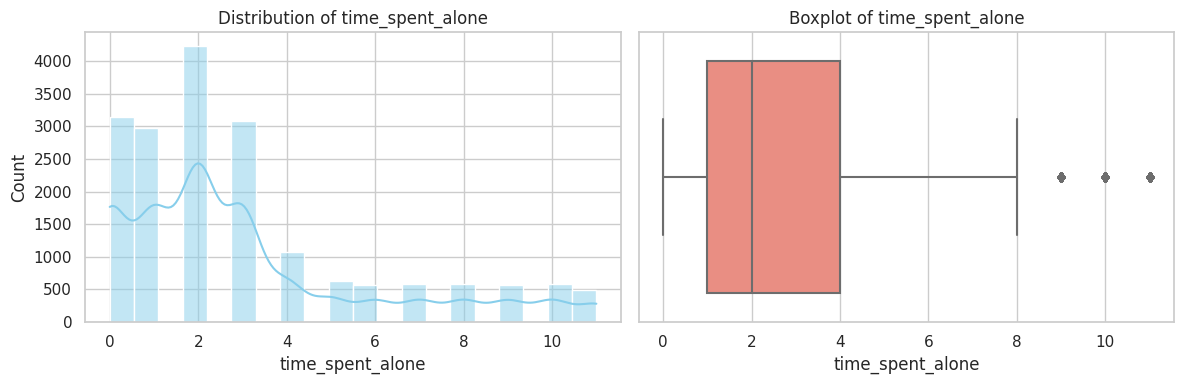

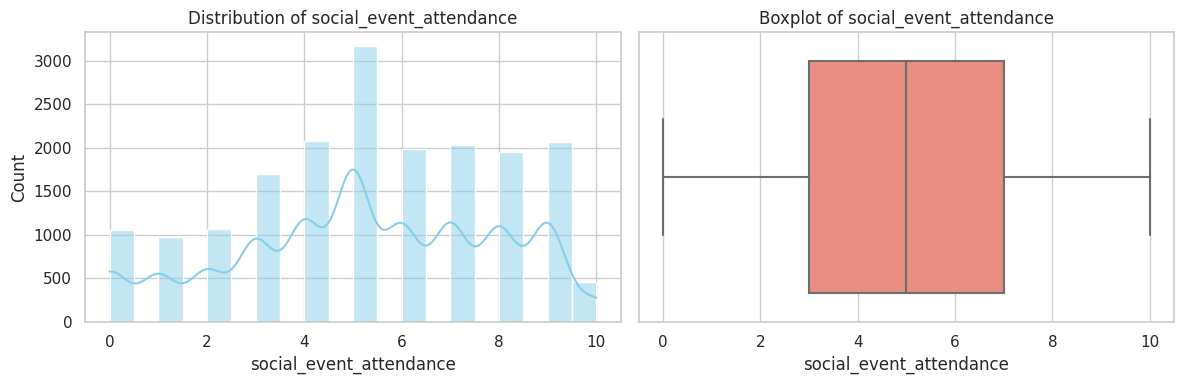

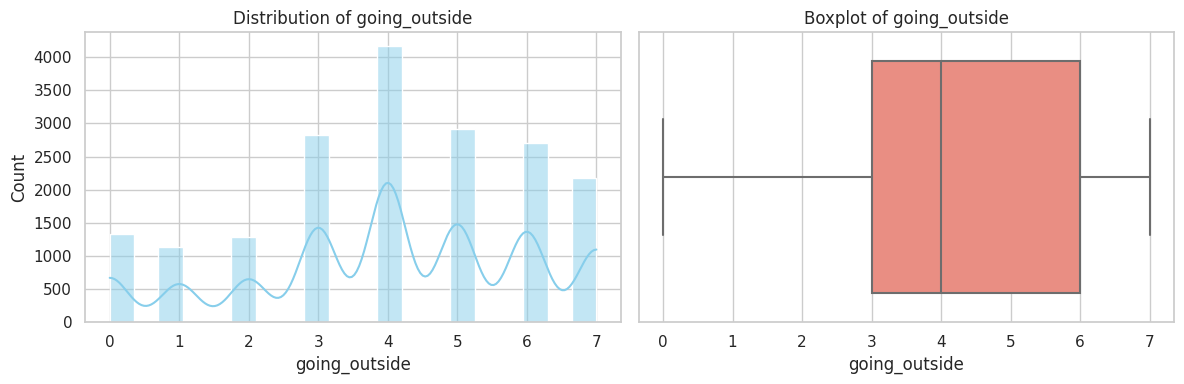

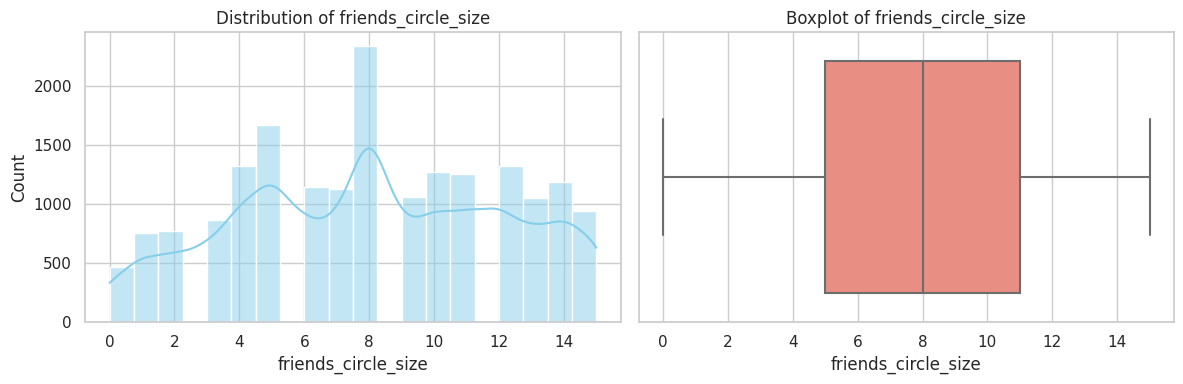

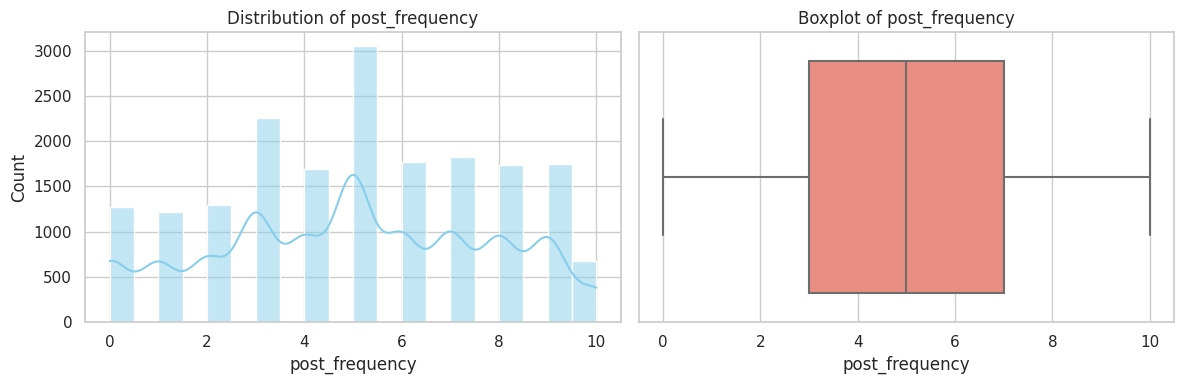

In [16]:

for col in numerical_features:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col], color='salmon')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


**Category Column**

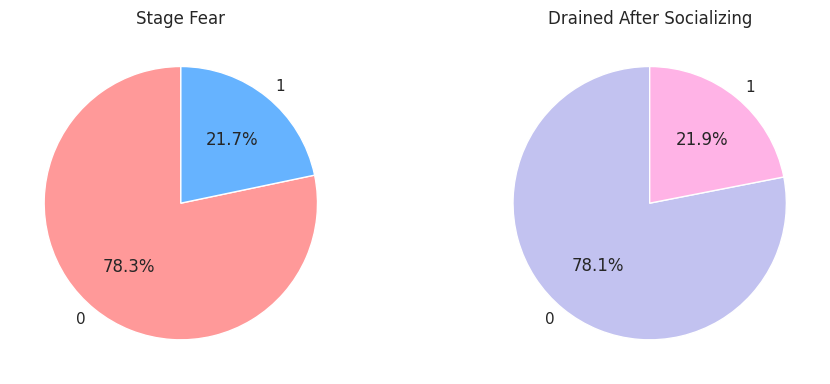

In [17]:
plt.figure(figsize=(10, 4))

# First subplot: stage_fear
plt.subplot(1, 2, 1)
train['stage_fear'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title('Stage Fear')
plt.ylabel('')

# Second subplot: drained_after_socializing 
plt.subplot(1, 2, 2)
train['drained_after_socializing'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#c2c2f0', '#ffb3e6']
)
plt.title('Drained After Socializing')
plt.ylabel('')

plt.tight_layout()
plt.show()


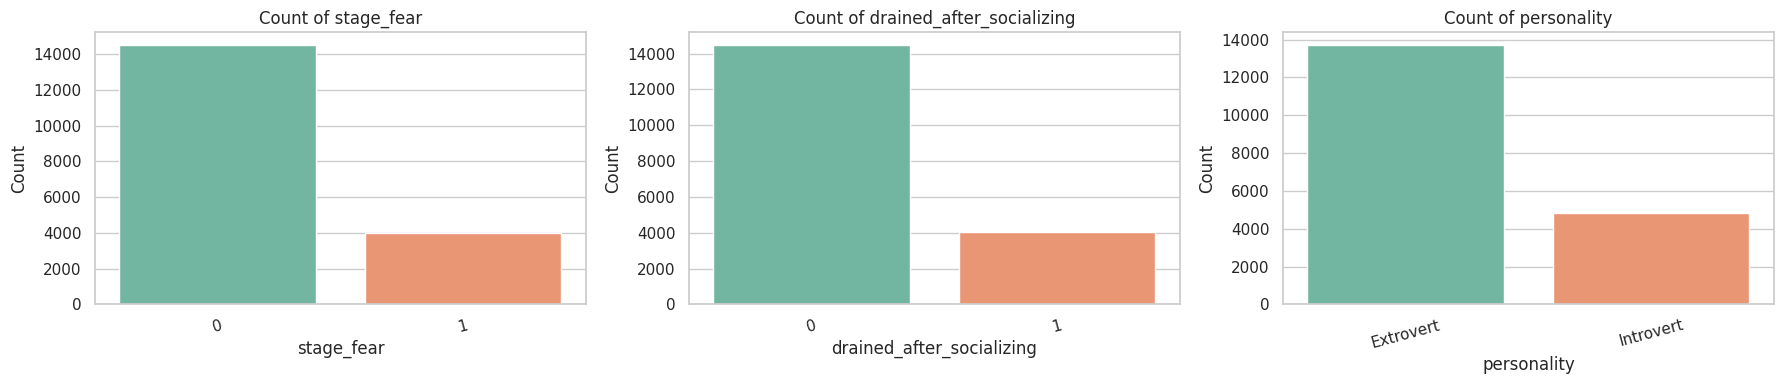

In [18]:
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 4))

# Loop through features and axes
for i, col in enumerate(categorical_features):
    sns.countplot(data=train, x=col, order=train[col].value_counts().index, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


# Bivariate Analysis

**Numerical Features vs Personality**

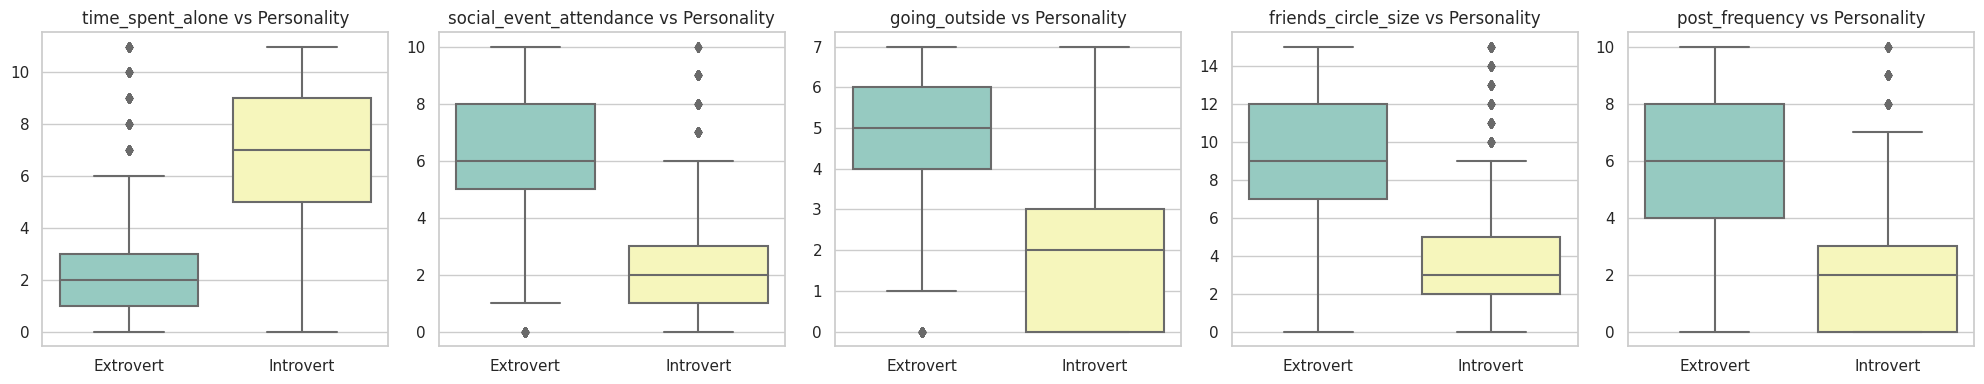

In [19]:
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 4))

# Loop and plot
for i, col in enumerate(numerical_features):
    sns.boxplot(data=train, x='personality', y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f"{col} vs Personality")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

**Categorical Features vs Personality**

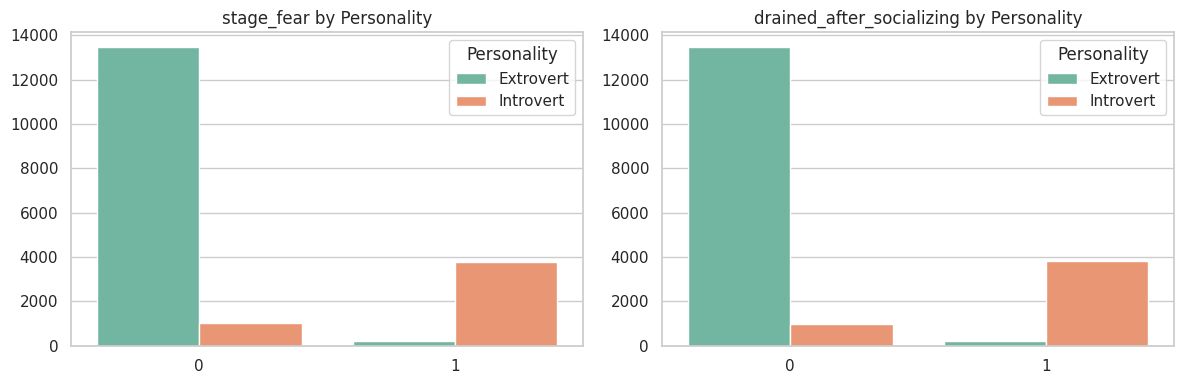

In [20]:
binary_features = ['stage_fear', 'drained_after_socializing']


fig, axes = plt.subplots(1, len(binary_features), figsize=(12, 4))

# Loop and plot
for i, col in enumerate(binary_features):
    sns.countplot(data=train, x=col, hue='personality', palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col} by Personality")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Personality')

plt.tight_layout()
plt.show()


# Multivariate Analysis 

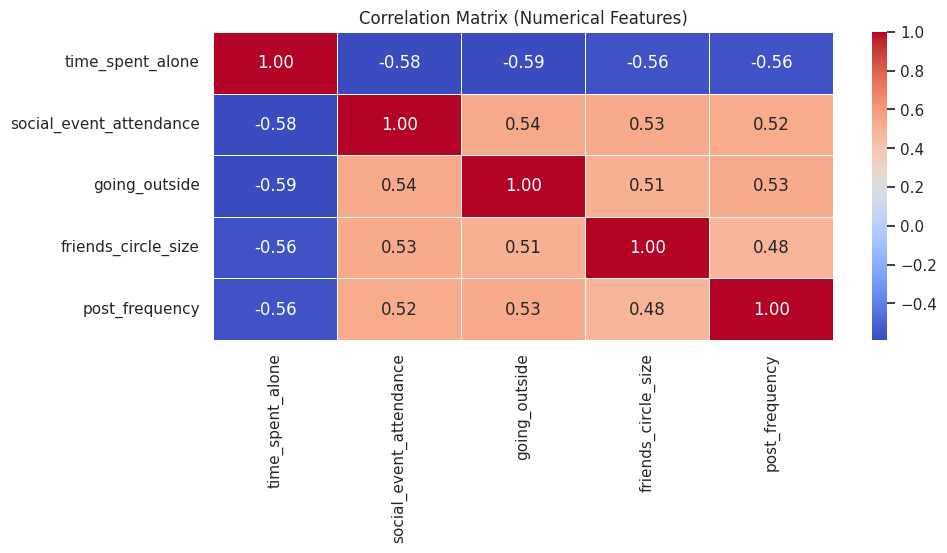

In [21]:
numerical_cols = ['time_spent_alone', 'social_event_attendance', 
                  'going_outside', 'friends_circle_size', 'post_frequency']


corr_matrix = train[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [22]:
# Map target to binary
train_encoded = train.copy()
train_encoded['personality'] = train_encoded['personality'].map({'Introvert': 0, 'Extrovert': 1})

# Compute correlation with target
target_corr = train_encoded[numerical_cols + ['personality']].corr()['personality'].drop('personality')
print(target_corr.sort_values(ascending=False))


social_event_attendance    0.674635
going_outside              0.674389
post_frequency             0.647048
friends_circle_size        0.634583
time_spent_alone          -0.750859
Name: personality, dtype: float64


#  Missing Values by Personality Class

In [23]:
train_copy = train.copy()

# Group-wise missing value % comparison (use a list for column selection)
cols = ['time_spent_alone', 'social_event_attendance', 
        'going_outside', 'friends_circle_size', 'post_frequency']

missing_by_group = train_copy.groupby('personality')[cols].apply(lambda x: x.isnull().mean() * 100)

# Transpose to make rows = features, columns = personality class
print("Missing Value % by Personality:")
print(missing_by_group.T.round(2))


Missing Value % by Personality:
personality              Extrovert  Introvert
time_spent_alone               0.0        0.0
social_event_attendance        0.0        0.0
going_outside                  0.0        0.0
friends_circle_size            0.0        0.0
post_frequency                 0.0        0.0


# Feature Interactions

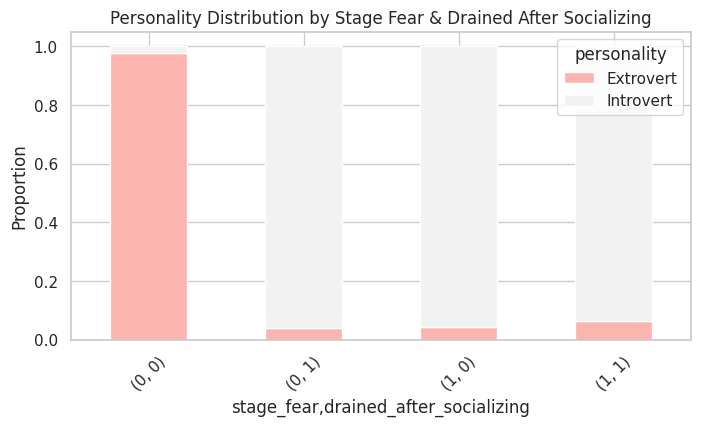

In [24]:
interaction_ct = pd.crosstab(index=[train['stage_fear'], train['drained_after_socializing']], 
                             columns=train['personality'], normalize='index')

interaction_ct.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Pastel1')
plt.title("Personality Distribution by Stage Fear & Drained After Socializing")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()


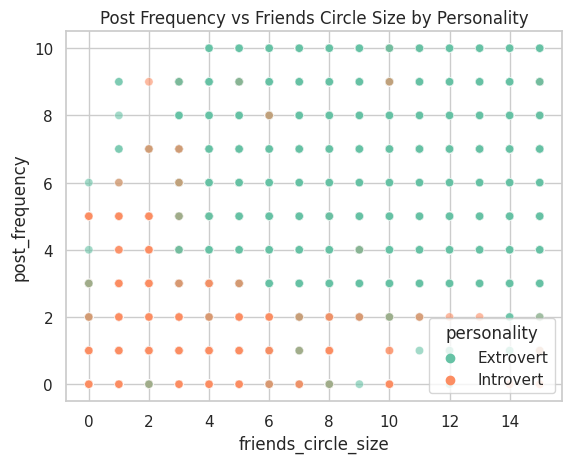

In [25]:
sns.scatterplot(data=train, x='friends_circle_size', y='post_frequency', 
                hue='personality', palette='Set2', alpha=0.6)
plt.title("Post Frequency vs Friends Circle Size by Personality")
plt.show()


# KDE plot

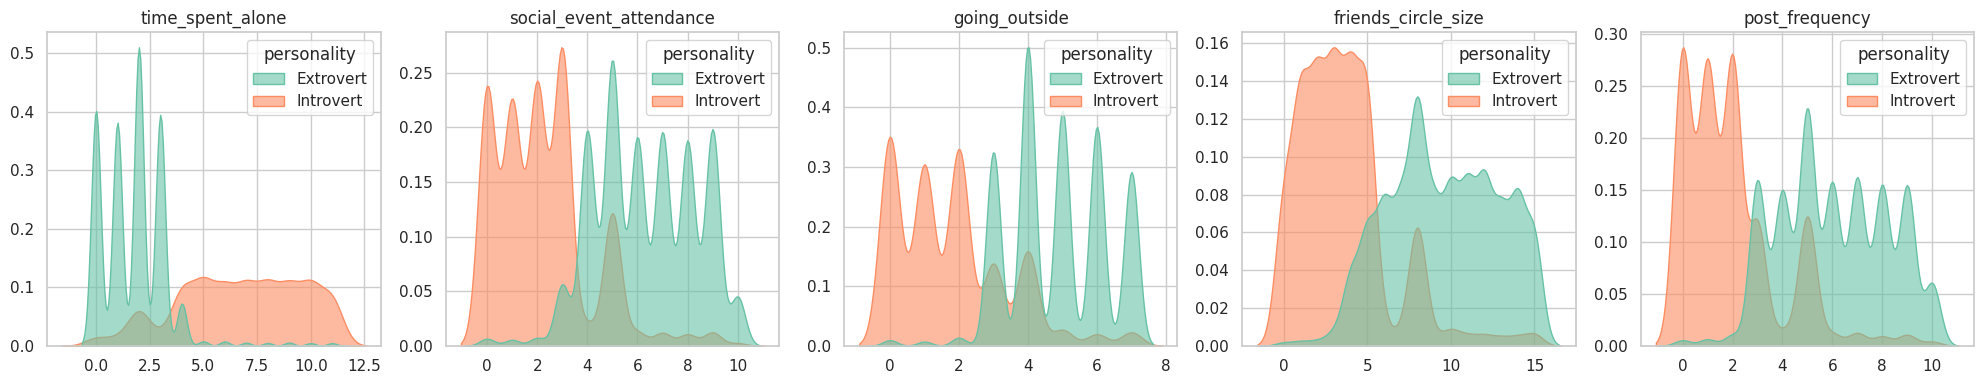

In [26]:
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 4))

# Loop and plot KDE for each feature split by personality
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=train, x=col, hue='personality', ax=axes[i], 
                fill=True, common_norm=False, palette='Set2', alpha=0.6)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# KDE plot + Trend


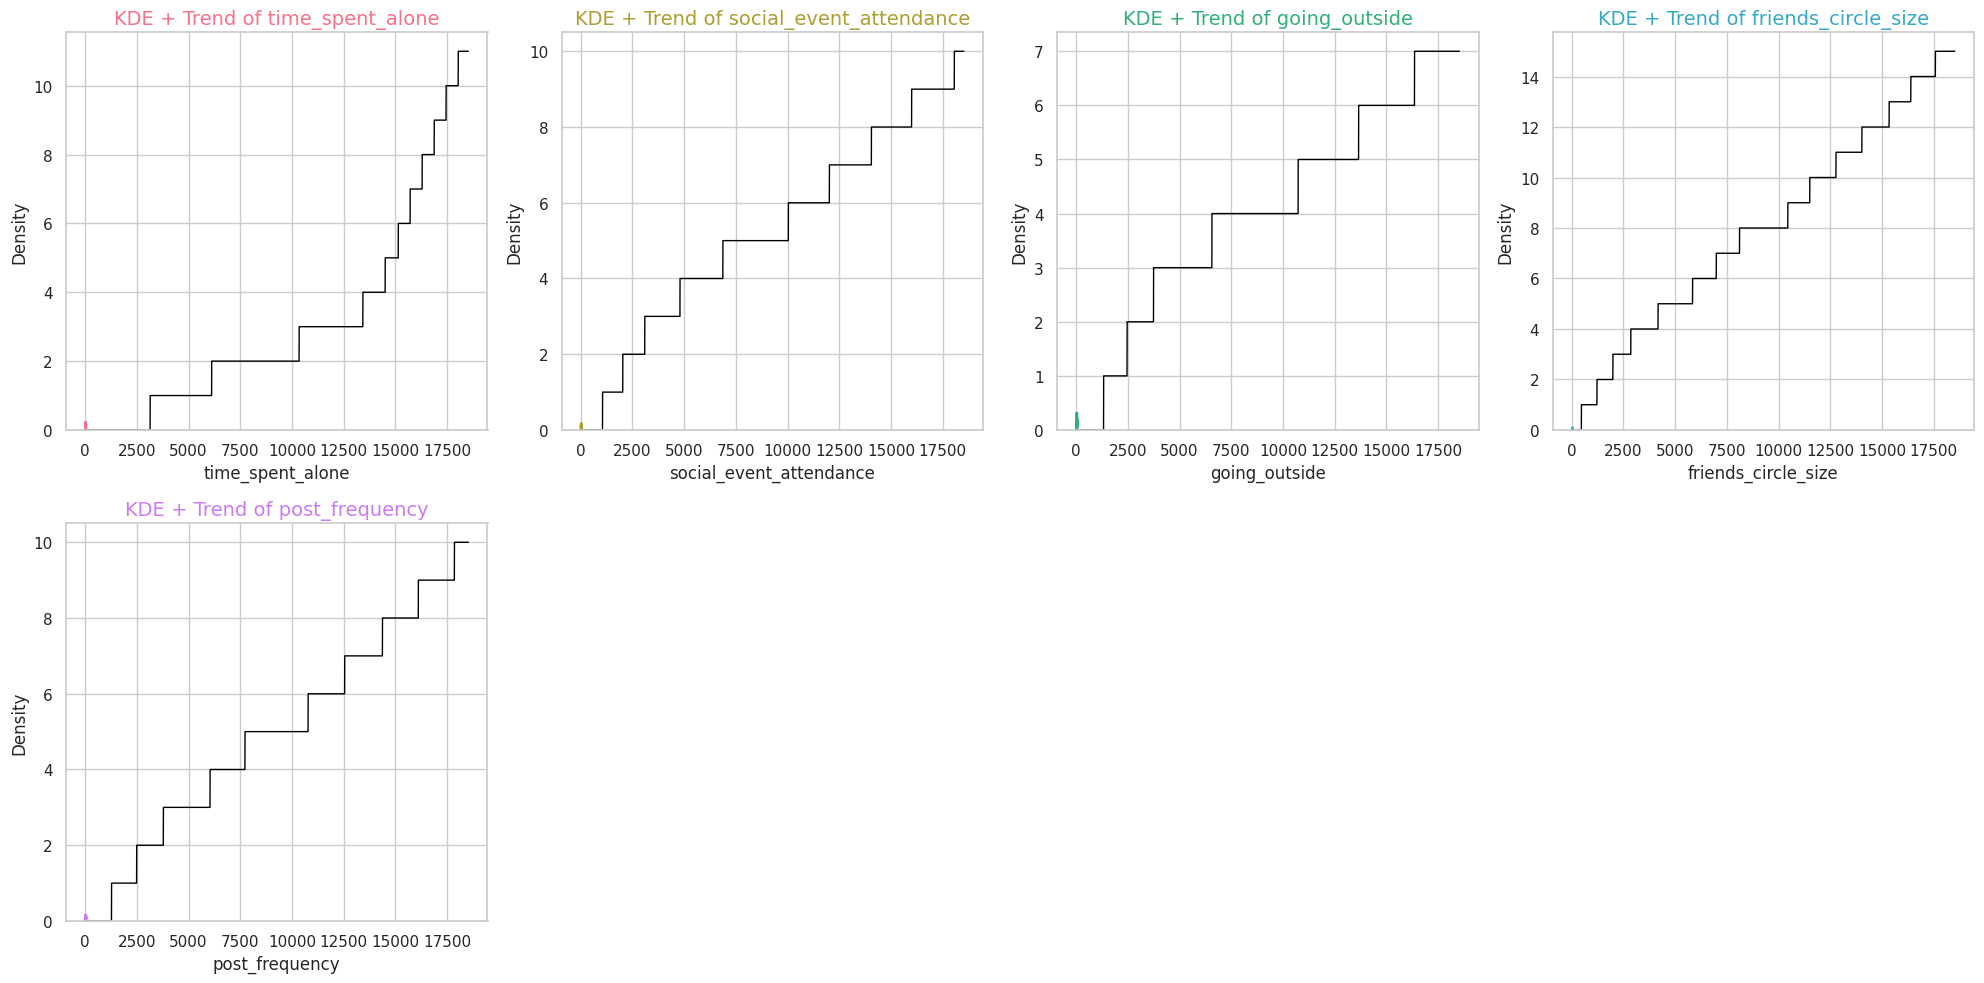

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['time_spent_alone', 'social_event_attendance', 
                      'going_outside', 'friends_circle_size', 'post_frequency']

colors = sns.color_palette('husl', len(numerical_features))
rows = -(-len(numerical_features) // 4)

plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(numerical_features, colors), 1):
    plt.subplot(rows, 4, i)

    # Plot KDE (this was missing!)
    sns.kdeplot(data=train, x=col, fill=True, color=color, alpha=0.4, linewidth=2)

    # Trend line of sorted values (optional overlay)
    sorted_vals = train[col].dropna().sort_values().reset_index(drop=True)
    sns.lineplot(x=sorted_vals.index, y=sorted_vals, color='black', linewidth=1)

    plt.title(f'KDE + Trend of {col}', fontsize=14, color=color)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()



# Feature Engineering

In [28]:

train['social_engagement_score'] = train['social_event_attendance'] + \
                                   train['going_outside'] + \
                                   train['post_frequency'] + \
                                   train['friends_circle_size']

test['social_engagement_score'] = test['social_event_attendance'] + \
                                  test['going_outside'] + \
                                  test['post_frequency'] + \
                                  test['friends_circle_size']


In [29]:
if train['personality'].dtype == 'object':
    train['personality'] = train['personality'].map({'Introvert': 0, 'Extrovert': 1})

# Model Training

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
X = train.drop(columns=['id', 'personality'])
y = train['personality']

# Same columns for test set
X_test = test.drop(columns=['id'])

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
# Dictionary to store models and results
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


LogisticRegression Accuracy: 0.9652
RandomForest Accuracy: 0.9630
XGBoost Accuracy: 0.9636
CatBoost Accuracy: 0.9646


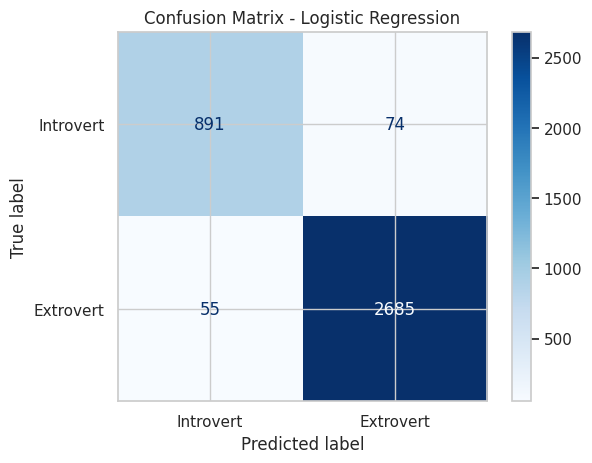

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
val_preds = models['LogisticRegression'].predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])

# Plot
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on full training set
logreg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Deviation:", cv_scores.std())


Cross-validation scores: [0.96815115 0.97031039 0.96437247 0.96707152 0.9738121 ]
Mean CV Accuracy: 0.968743525619165
Std Deviation: 0.0031748415098169927


# Submission 

In [36]:
# Predict on test set
test_preds = models['LogisticRegression'].predict(X_test)

# Prepare final submission file
submission['Personality'] = np.where(test_preds == 1, 'Extrovert', 'Introvert')
submission.to_csv("submission.csv", index=False)
